In [1]:
# import dependencies
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy

In [2]:
# import api keys
from api_keys import (wkey, gkey)

In [3]:
# import country code dictionary
from ISO3166 import ISO3166

### Retrieve the Relevant City Names

In [4]:
# specify the +/- of latitude for the search criteria
latitudeRange = 20

# initialize the list of city names
cityNames = []
countryCodes = []

# iterate across the globe
for x in range(0, 360, 3):
    
    # iterate through the specified latitude range
    for y in range(-latitudeRange, latitudeRange + 1, 1):
        city = citipy.nearest_city(y, x)
        cityName = city.city_name
        countryCode = city.country_code
        
        # add the new city to the cityNames list if it isn't already there
        if cityName not in cityNames:
            cityNames.append(cityName)
            countryCodes.append(countryCode)

print(f"A total of {len(cityNames)} cities have been retrieved.")

A total of 835 cities have been retrieved.


### Retrieve the Weather Data

In [5]:
# specify the unit types
units = "imperial"

# initialize the lists
temperature_Data = []
humidity_Data = []
cloudiness_Data = []
windSpeed_Data = []
latitude_Data = []

# create the country name variable
countryName = ""

# iterate through the retrieved cities (limited during development)
#for i in range(len(cityNames)):
for i in range(100):
    
    # assign the country name
    try:
        countryName = ISO3166[countryCodes[i].upper()]
    except KeyError:
        countryName = {countryCodes[i]}
        print("Country code did not exist in the provided dictionary.")
    
    # construct the request URL with an f-string
    if units == "standard":
        url = f"https://api.openweathermap.org/data/2.5/weather?q={cityNames[i]},{countryCodes[i]}&appid={wkey}"
    else:
        url = f"https://api.openweathermap.org/data/2.5/weather?q={cityNames[i]},{countryCodes[i]}&appid={wkey}&units={units}"
    
    # perform the api request
    response_json = requests.get(url).json()
    
    try:
        # store the relevant output in their respective lists
        temperature_Data.append(response_json["main"]["temp"])
        humidity_Data.append(response_json["main"]["humidity"])
        cloudiness_Data.append(response_json["clouds"]["all"])
        windSpeed_Data.append(response_json["wind"]["speed"])
        latitude_Data.append(response_json["coord"]["lat"])
        
        # contribute to the print log
        print(f"City #{i}: {cityNames[i]}, {countryName}")
        
    except KeyError:
        print(f"City #{i}: key did not exist in the JSON object (City = {cityNames[i]}).")
    
    # constrain the request rate to ~57/minute
    time.sleep(1.05)

print(f"A total of {len(temperature_Data)} cities have been successfully analyzed.")

City #0: jamestown, St. Helena
City #1: port-gentil, Gabon
City #2: takoradi, Ghana
City #3: cape coast, Ghana
City #4: mumford, Ghana
City #5: winneba, Ghana
City #6: accra, Ghana
City #7: akropong, Ghana
City #8: kpandu, Ghana
City #9: kpandae, Ghana
City #10: yendi, Ghana
City #11: dapaong, Togo
City #12: koupela, Burkina Faso
City #13: bogande, Burkina Faso
City #14: dori, Burkina Faso
City #15: gorom-gorom, Burkina Faso
City #16: gao, Mali
City #17: kidal, Mali
City #18: tessalit, Mali
City #19: mayumba, Gabon
City #20: gamba, Gabon
City #21: omboue, Gabon
City #22: yenagoa, Nigeria
City #23: anloga, Ghana
City #24: cotonou, Benin
City #25: lagos, Nigeria
City #26: ifo, Nigeria
City #27: save, Benin
City #28: tchaourou, Benin
City #29: nikki, Benin
City #30: kandi, Benin
City #31: malanville, Benin
City #32: dosso, Niger
City #33: filingue, Niger
City #34: namibe, Angola
City #35: luanda, Angola
City #36: soyo, Angola
City #37: abonnema, Nigeria
City #38: agbor, Nigeria
City #39: 

### Display the Weather Data

In [6]:
# specify the plot specific variables
markers = "o"
size = 15
color = "red"
edgeColors = "black"
regressionColor = "blue"
lineStyle = "-."

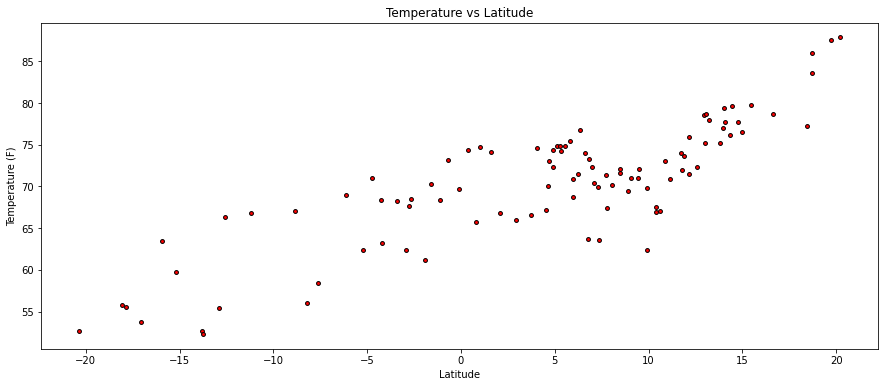

In [7]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            temperature_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude")

# save the plot
plt.savefig("Images/Temperature vs Latitude.png")

# show the plot
plt.show()

This plot looks for signs of correlation between a city's position and its current temperature. It does so by plotting the retrieved data as a scatter plot.

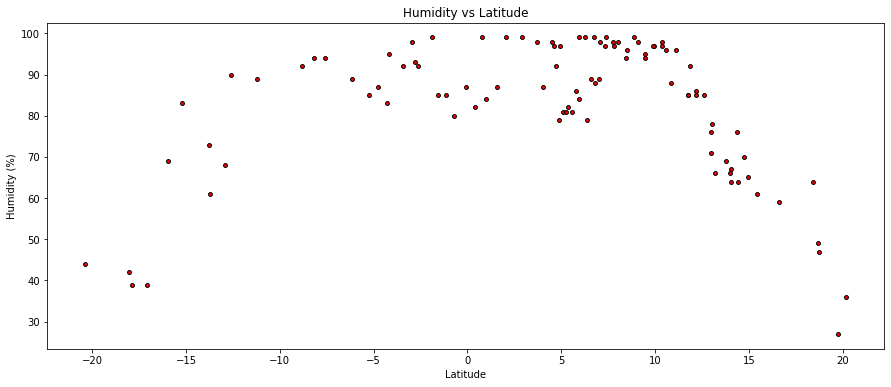

In [8]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            humidity_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")

# save the plot
plt.savefig("Images/Humidity vs Latitude.png")

# show the plot
plt.show()

This plot looks for signs of correlation between a city's position and its current humidity. It does so by plotting the retrieved data as a scatter plot.

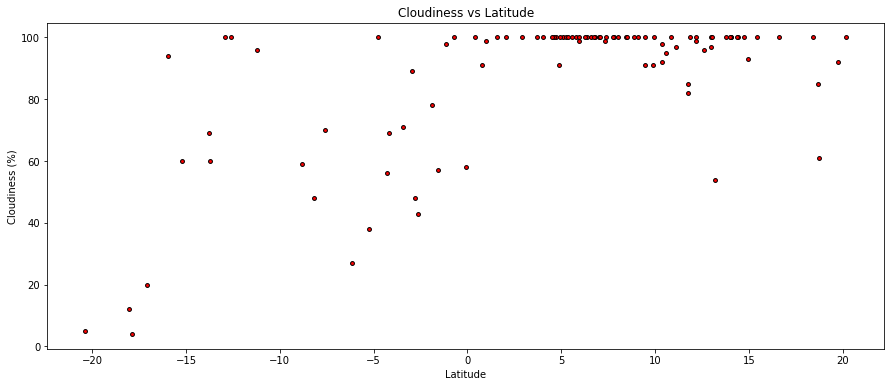

In [9]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            cloudiness_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")

# save the plot
plt.savefig("Images/Cloudiness vs Latitude.png")

# show the plot
plt.show()

This plot looks for signs of correlation between a city's position and its current cloudiness. It does so by plotting the retrieved data as a scatter plot.

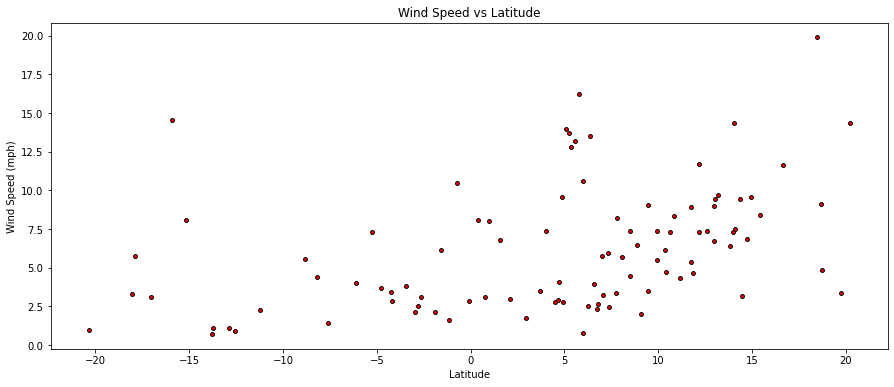

In [10]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            windSpeed_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitude")

# save the plot
plt.savefig("Images/Wind Speed vs Latitude.png")

# show the plot
plt.show()

This plot looks for signs of correlation between a city's position and its current wind speed. It does so by plotting the retrieved data as a scatter plot.

### Combine Lists into DataFrame

In [11]:
# combine the lists into a DataFrame to work better in a regression
weather_df = pd.DataFrame({
                        "Latitude": latitude_Data,
                        "Temperature (F)": temperature_Data,
                        "Humidity (%)": humidity_Data,
                        "Cloudiness (%)": cloudiness_Data,
                        "Wind Speed (mph)": windSpeed_Data})

# save the dataframe to file
weather_df.to_csv("Output/city_weather_data", index = False)

# create Northern hemisphere DataFrame
northern_df = weather_df.loc[weather_df["Latitude"] >= 0, :].reset_index()

# create Southern hemisphere DataFrame
southern_df = weather_df.loc[weather_df["Latitude"] < 0, :].reset_index()

In [12]:
# extract the x series for use in the linear regressions
x_values_northern = northern_df["Latitude"]
x_values_southern = southern_df["Latitude"]

# extract the y series for use in the linear regressions
y_values_northern_temperature = northern_df["Temperature (F)"]
y_values_northern_humidity = northern_df["Humidity (%)"]
y_values_northern_cloudiness = northern_df["Cloudiness (%)"]
y_values_northern_windspeed = northern_df["Wind Speed (mph)"]
y_values_southern_temperature = southern_df["Temperature (F)"]
y_values_southern_humidity = southern_df["Humidity (%)"]
y_values_southern_cloudiness = southern_df["Cloudiness (%)"]
y_values_southern_windspeed = southern_df["Wind Speed (mph)"]

### Perform the Linear Regressions (Temperature)

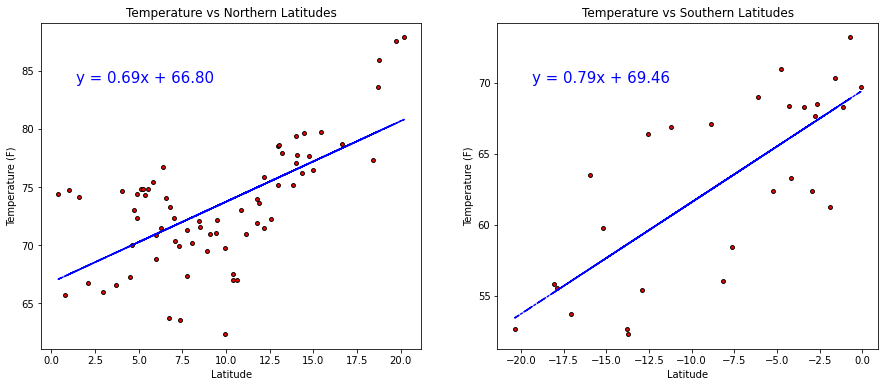

In [13]:
# define the line equation's position variables (% of axis)
x_northern = 0.05
y_northern = 0.85
x_southern = 0.05
y_southern = 0.85

# reuse variables for easier reassignment
y_values_northern = y_values_northern_temperature
y_values_southern = y_values_southern_temperature

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern
y_position_northern = min(y_values_northern) + (max(y_values_northern) - min(y_values_northern)) * y_northern
y_position_southern = min(y_values_southern) + (max(y_values_southern) - min(y_values_southern)) * y_southern

# add the line equation
ax0.annotate(line_equationN, (x_position_northern, y_position_northern), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationS, (x_position_southern, y_position_southern), fontsize = 15, color = regressionColor)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel("Temperature (F)")
ax0.set_title("Temperature vs Northern Latitudes")

ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Temperature vs Southern Latitudes")

# save the plot
plt.savefig("Images/Temperature vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Humidity)

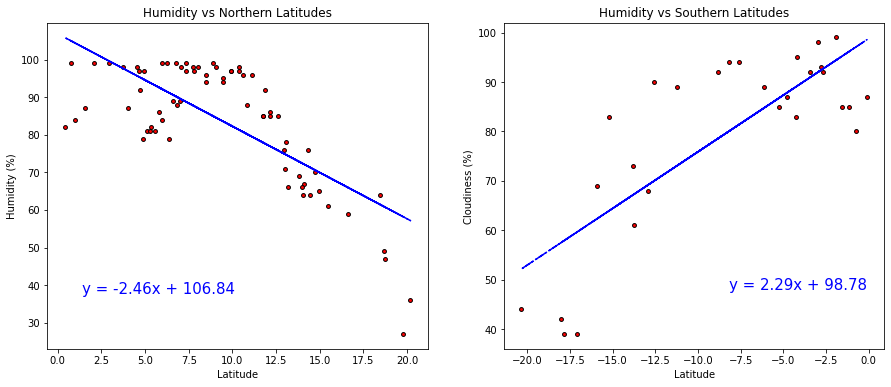

In [14]:
# define the line equation's position variables (% of axis)
x_northern = 0.05
y_northern = 0.15
x_southern = 0.60
y_southern = 0.15

# reuse variables for easier reassignment
y_values_northern = y_values_northern_humidity
y_values_southern = y_values_southern_humidity

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern
y_position_northern = min(y_values_northern) + (max(y_values_northern) - min(y_values_northern)) * y_northern
y_position_southern = min(y_values_southern) + (max(y_values_southern) - min(y_values_southern)) * y_southern

# add the line equation
ax0.annotate(line_equationN, (x_position_northern, y_position_northern), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationS, (x_position_southern, y_position_southern), fontsize = 15, color = regressionColor)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel("Humidity (%)")
ax0.set_title("Humidity vs Northern Latitudes")

ax1.set_xlabel("Latitude")
ax1.set_ylabel("Cloudiness (%)")
ax1.set_title("Humidity vs Southern Latitudes")

# save the plot
plt.savefig("Images/Humidity vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Cloudiness)

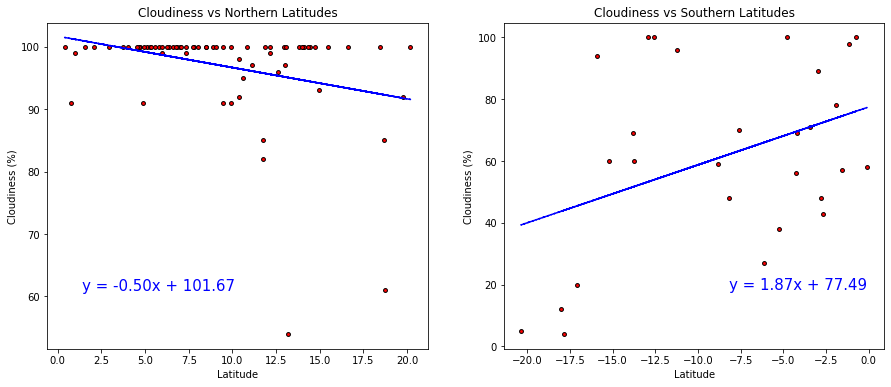

In [17]:
# define the line equation's position variables (% of axis)
x_northern = 0.05
y_northern = 0.15
x_southern = 0.60
y_southern = 0.15

# reuse variables for easier reassignment
y_values_northern = y_values_northern_cloudiness
y_values_southern = y_values_southern_cloudiness

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern
y_position_northern = min(y_values_northern) + (max(y_values_northern) - min(y_values_northern)) * y_northern
y_position_southern = min(y_values_southern) + (max(y_values_southern) - min(y_values_southern)) * y_southern

# add the line equation
ax0.annotate(line_equationN, (x_position_northern, y_position_northern), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationS, (x_position_southern, y_position_southern), fontsize = 15, color = regressionColor)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel("Cloudiness (%)")
ax0.set_title("Cloudiness vs Northern Latitudes")

ax1.set_xlabel("Latitude")
ax1.set_ylabel("Cloudiness (%)")
ax1.set_title("Cloudiness vs Southern Latitudes")

# save the plot
plt.savefig("Images/Cloudiness vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Wind Speed)

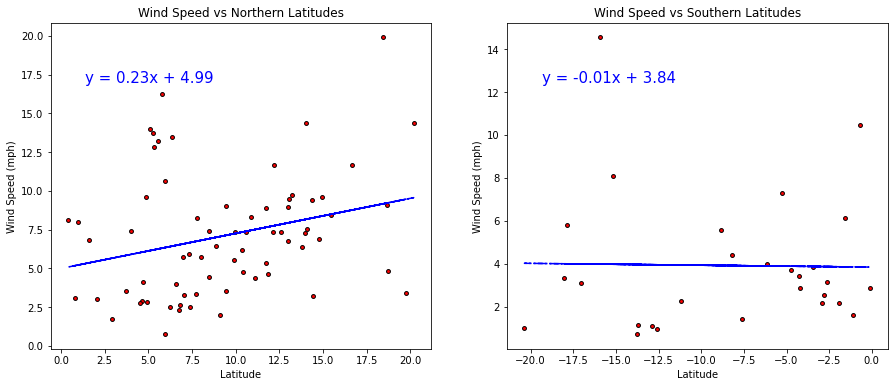

In [16]:
# define the line equation's position variables (% of axis)
x_northern = 0.05
y_northern = 0.85
x_southern = 0.05
y_southern = 0.85

# reuse variables for easier reassignment
y_values_northern = y_values_northern_windspeed
y_values_southern = y_values_southern_windspeed

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern
y_position_northern = min(y_values_northern) + (max(y_values_northern) - min(y_values_northern)) * y_northern
y_position_southern = min(y_values_southern) + (max(y_values_southern) - min(y_values_southern)) * y_southern

# add the line equation
ax0.annotate(line_equationN, (x_position_northern, y_position_northern), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationS, (x_position_southern, y_position_southern), fontsize = 15, color = regressionColor)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel("Wind Speed (mph)")
ax0.set_title("Wind Speed vs Northern Latitudes")

ax1.set_xlabel("Latitude")
ax1.set_ylabel("Wind Speed (mph)")
ax1.set_title("Wind Speed vs Southern Latitudes")

# save the plot
plt.savefig("Images/Wind Speed vs Latitudes - Regression.png")

# show the plot
plt.show()